<a href="https://colab.research.google.com/github/RiskyDwiRamadhan/PCVK_GENAP_2022/blob/main/Tugas_Besar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt
import fastai.vision as vision
import numpy as np

In [2]:
# Meminta izin untuk mengakses drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
path = '../content/drive/MyDrive/PCVK/Tugas besar/'
os.listdir(path)

['labels_coco.json', 'Oil Storage Tanks', 'labels.json']

In [8]:
json_labels = json.load(open(os.path.join(path,'labels.json')))
print('Number of Images: ',len(json_labels))
json_labels[25:30]

Number of Images:  10000


[{'file_name': '01_2_5.jpg', 'id': 25, 'label': 'Skip'},
 {'file_name': '01_2_6.jpg',
  'id': 26,
  'label': {'Tank': [{'geometry': [{'x': 483, 'y': 284},
      {'x': 483, 'y': 316},
      {'x': 511, 'y': 316},
      {'x': 511, 'y': 284}]},
    {'geometry': [{'x': 482, 'y': 325},
      {'x': 482, 'y': 356},
      {'x': 512, 'y': 356},
      {'x': 512, 'y': 325}]}]}},
 {'file_name': '01_2_7.jpg',
  'id': 27,
  'label': {'Tank': [{'geometry': [{'x': 8, 'y': 284},
      {'x': 8, 'y': 316},
      {'x': 41, 'y': 316},
      {'x': 41, 'y': 284}]},
    {'geometry': [{'x': 8, 'y': 324},
      {'x': 8, 'y': 356},
      {'x': 41, 'y': 356},
      {'x': 41, 'y': 324}]},
    {'geometry': [{'x': 55, 'y': 284},
      {'x': 55, 'y': 302},
      {'x': 74, 'y': 302},
      {'x': 74, 'y': 284}]},
    {'geometry': [{'x': 147, 'y': 333},
      {'x': 147, 'y': 361},
      {'x': 174, 'y': 361},
      {'x': 174, 'y': 333}]},
    {'geometry': [{'x': 147, 'y': 365},
      {'x': 147, 'y': 392},
      {'x': 174,

{'Skip': 8171, 'Tank': 341, 'Tank Cluster': 81, 'Floating Head Tank': 1595}


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


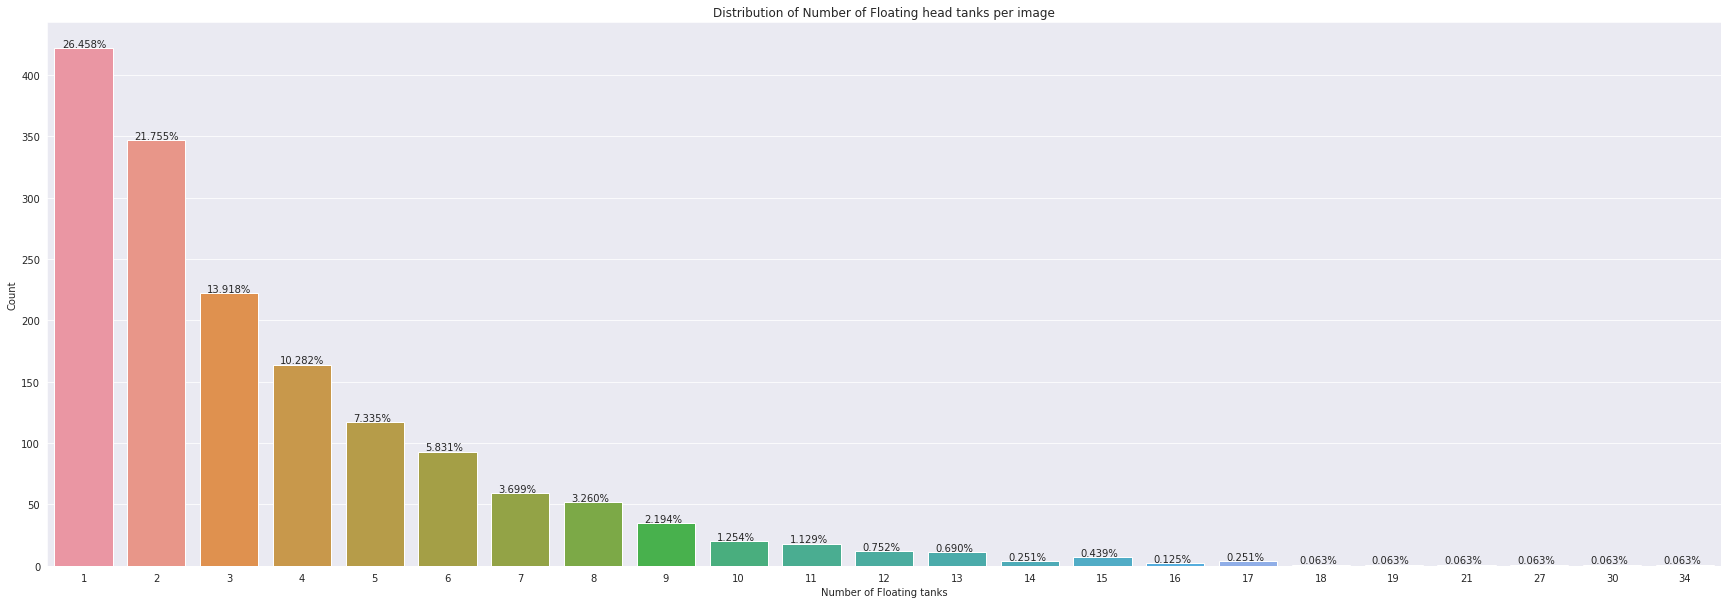

In [9]:
distinct_labels = dict() # Distinct labels with their count
No_FHT_per_img = [] # Number of floating head tank per image
for i in range(len(json_labels)):
    if(json_labels[i]['label']=='Skip'):
        distinct_labels['Skip'] = distinct_labels.get('Skip',0) + 1
    else:
        for l in json_labels[i]['label'].keys():
            distinct_labels[l] = distinct_labels.get(l,0) + 1
            
            if(l=='Floating Head Tank'):
                No_FHT = len(json_labels[i]['label']['Floating Head Tank'])   
                No_FHT_per_img.append(No_FHT)
print(distinct_labels)

sns.set({'figure.figsize':(30,10)})
ax = sns.countplot(No_FHT_per_img)
for p in ax.patches:
    ax.annotate('{:.3f}%'.format(100*p.get_height()/len(No_FHT_per_img)), (p.get_x()+0.1, p.get_height()+1))
ax.set_title('Distribution of Number of Floating head tanks per image')
ax.set_xlabel('Number of Floating tanks')
ax.set_ylabel('Count')
plt.show()

In [10]:
json_labels_coco = json.load(open(os.path.join(path,'labels_coco.json')))
print('Number of Floating tanks: ',len(json_labels_coco['annotations']))

no_unique_img_id = set()
for ann in json_labels_coco['annotations']:
    no_unique_img_id.add(ann['image_id'])
print('Number of Images that contains Floating head tank: ', len(no_unique_img_id))
json_labels_coco['annotations'][:8]

Number of Floating tanks:  1572
Number of Images that contains Floating head tank:  417


[{'bbox': [275, 414, 59, 57], 'category_id': 1, 'image_id': 28},
 {'bbox': [416, 147, 21, 19], 'category_id': 1, 'image_id': 30},
 {'bbox': [224, 260, 91, 89], 'category_id': 1, 'image_id': 39},
 {'bbox': [313, 432, 55, 57], 'category_id': 1, 'image_id': 39},
 {'bbox': [444, 434, 52, 53], 'category_id': 1, 'image_id': 39},
 {'bbox': [201, 478, 90, 34], 'category_id': 1, 'image_id': 39},
 {'bbox': [15, 491, 57, 20], 'category_id': 1, 'image_id': 42},
 {'bbox': [364, 365, 58, 53], 'category_id': 1, 'image_id': 43}]

In [11]:
def conv_bbox(box_dict):
    
    xs = np.array(list(set([i['x'] for i in box_dict])))
    ys = np.array(list(set([i['y'] for i in box_dict])))
    
    x_min = xs.min()
    x_max = xs.max()
    y_min = ys.min()
    y_max = ys.max()
    
    return y_min, x_min, y_max, x_max

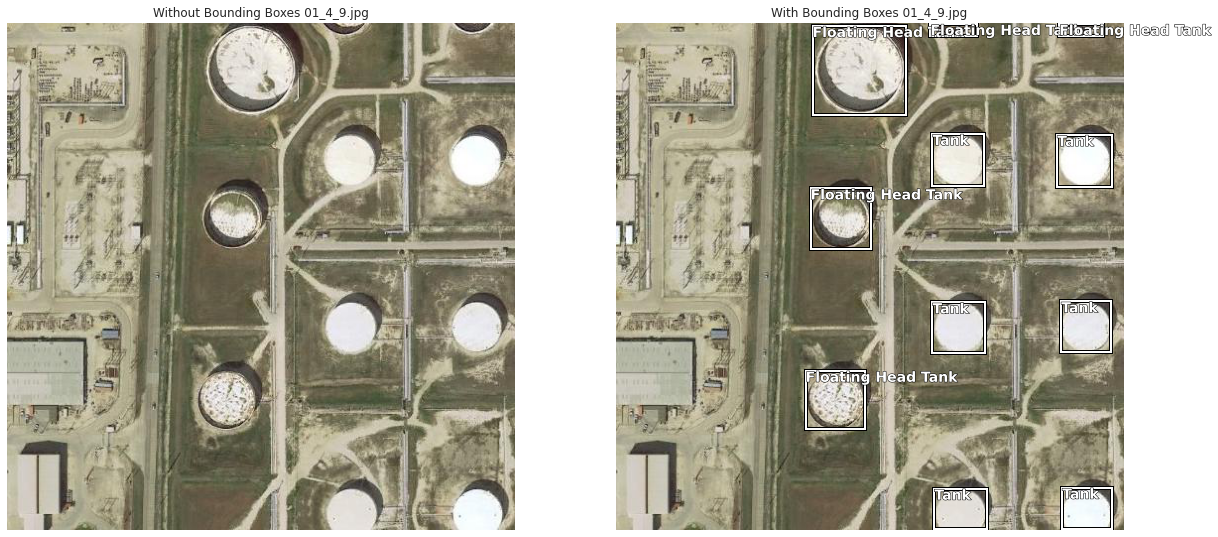

In [14]:
def plot_BBox(img_name):
    sns.set({'figure.figsize':(20,10)})
    img_path = os.path.join(path+'Oil Storage Tanks', img_name)
    image = vision.open_image(img_path)
    fig, ax = plt.subplots(1,2)
    image.show(ax=ax[0], title= 'Without Bounding Boxes '+img_name)
    image.show(ax=ax[1], title = 'With Bounding Boxes '+img_name)

    no,row,col = map(int,img_name.split('.')[0].split('_'))
    img_id = (no-1)*100 + row*10 + col

    idx = -1
    bboxes = []
    labels = []
    classes = []
    if(json_labels[img_id]['label'] != 'Skip'):
        for label in json_labels[img_id]['label'].keys():
            for box in json_labels[img_id]['label'][label]:
                bboxes.append(conv_bbox(box['geometry']))
                classes.append(label)
        labels = list(range(len(classes)))
        idx = 1
            
    if(idx!=-1):
        BBox = vision.ImageBBox.create(*image.size, bboxes, labels, classes)
        image.show(y=BBox, ax=ax[1])
    else:
        print('No Bounding Box annotation present for Floating Head Tank ')

    plt.show()
plot_BBox('01_4_9.jpg')